In [1]:
# installs
!python3.11 -m pip install numpy

In [2]:
import numpy as np

In [5]:
loaded = np.load("./endeavour.npz")
task1 = loaded["task1"]
task2 = loaded["task2"]
task3 = loaded["task3"]
task4 = loaded["task4"]
task6a = loaded["task6a"]
task6b = loaded["task6b"]
task7a = loaded["task7a"]
task7b = loaded["task7b"]

In [6]:
import matplotlib.pyplot as plt

In [9]:
def rotate_90_num(array, num):
    for i in range(num):
        array = np.rot90(array)
    return array

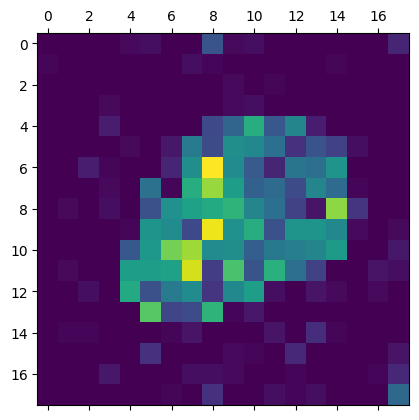

In [8]:
# reference pattern
plt.matshow(task1[0])

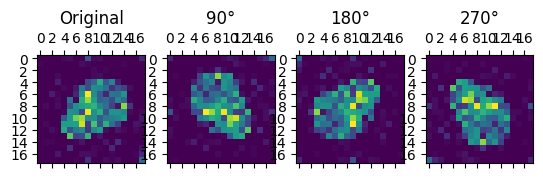

In [12]:
task_1_fig_1, axis = plt.subplots(1, 4)

axis[0].matshow(task1[0])
axis[0].set_title("Original")
axis[1].matshow(rotate_90_num(task1[0], 1))
axis[1].set_title("90°")
axis[2].matshow(rotate_90_num(task1[0], 2))
axis[2].set_title("180°")
axis[3].matshow(rotate_90_num(task1[0], 3))
axis[3].set_title("270°")

plt.show()

In [15]:
task_1_original = task1[0]
task_1_90 = rotate_90_num(task1[0], 1)
task_1_180 = rotate_90_num(task1[0], 2)
task_1_270 = rotate_90_num(task1[0], 3)

task_1_counts = [0, 0, 0, 0]

for i in task1:
    if np.array_equal(i, task_1_90):
        task_1_counts[1] += 1
    elif np.array_equal(i, task_1_180):
        task_1_counts[2] += 1
    elif np.array_equal(i, task_1_270):
        task_1_counts[3] += 1
    else:
        task_1_counts[0] += 1

task_1_counts

[6, 3, 6, 10]